## Zillow Data

## Project Outline:
- Deliver presenatation: Monday morning, 20 June
- Day 0: Today: Tuesday, 14 June
    - project outline and outlier handling
    - incorporate the last project's findings/recommendations as an intro/recap
- Day 1: Wednesday: Full Wrangle and Explore
    - define high logerror, visually plot variables with a high propensity to produce distinct logerror clusters >> end the day with clusters
- Day 2: Thurday: Full Explore
    - fully explore clusters/subsets and 
- Day 3: Friday: Model and produce fianl notebook, README, and 
    - model the logerror by cluster with an appropriate linear regression predictor (predicts continuous values)

## 1. Wrangle

In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import env
import os
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import wrangle
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
#acquire the zillow data
full_df = wrangle.get_zillow_data()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   buildingclasstypeid           0 non-null      float64
 2   heatingorsystemtypeid         33936 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   storytypeid                   47 non-null     float64
 6   propertylandusetypeid         52442 non-null  float64
 7   parcelid                      52442 non-null  int64  
 8   id                            52442 non-null  int64  
 9   logerror                      52442 non-null  float64
 10  transactiondate               52442 non-null  object 
 11  id.1                          52442 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

### Notes:
 - initial SQL query returned 69 columns and 52442 rows

In [37]:
# run the data through our function to handle missing values
remove_nulls_df = wrangle.handle_missing_values(full_df)
remove_nulls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52440 non-null  float64
 1   parcelid                      52440 non-null  int64  
 2   id                            52440 non-null  int64  
 3   logerror                      52440 non-null  float64
 4   transactiondate               52440 non-null  object 
 5   id.1                          52440 non-null  int64  
 6   bathroomcnt                   52440 non-null  float64
 7   bedroomcnt                    52440 non-null  float64
 8   calculatedbathnbr             52305 non-null  float64
 9   calculatedfinishedsquarefeet  52360 non-null  float64
 10  finishedsquarefeet12          52195 non-null  float64
 11  fips                          52440 non-null  float64
 12  fullbathcnt                   52305 non-null  float64
 13  l

### Notes:
- removing >30% null columns and > 25% null rows returns a df with 30 cols and 52440 rows
- dropped 39 columns and 2 rows

In [38]:
remove_columns_df = wrangle.remove_columns(remove_nulls_df)
remove_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52440 non-null  int64  
 1   logerror                      52440 non-null  float64
 2   transactiondate               52440 non-null  object 
 3   bathroomcnt                   52440 non-null  float64
 4   bedroomcnt                    52440 non-null  float64
 5   calculatedbathnbr             52305 non-null  float64
 6   calculatedfinishedsquarefeet  52360 non-null  float64
 7   fips                          52440 non-null  float64
 8   fullbathcnt                   52305 non-null  float64
 9   latitude                      52440 non-null  float64
 10  longitude                     52440 non-null  float64
 11  lotsizesquarefeet             52073 non-null  float64
 12  propertycountylandusecode     52440 non-null  object 
 13  r

In [39]:
remove_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52440 non-null  int64  
 1   logerror                      52440 non-null  float64
 2   transactiondate               52440 non-null  object 
 3   bathroomcnt                   52440 non-null  float64
 4   bedroomcnt                    52440 non-null  float64
 5   calculatedbathnbr             52305 non-null  float64
 6   calculatedfinishedsquarefeet  52360 non-null  float64
 7   fips                          52440 non-null  float64
 8   fullbathcnt                   52305 non-null  float64
 9   latitude                      52440 non-null  float64
 10  longitude                     52440 non-null  float64
 11  lotsizesquarefeet             52073 non-null  float64
 12  propertycountylandusecode     52440 non-null  object 
 13  r

In [40]:
clean_d_types_df = wrangle.convert_data_types(remove_columns_df)
clean_d_types_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52440 non-null  object 
 1   logerror                      52440 non-null  float64
 2   transactiondate               52440 non-null  object 
 3   bathroomcnt                   52440 non-null  float64
 4   bedroomcnt                    52440 non-null  float64
 5   calculatedbathnbr             52305 non-null  float64
 6   calculatedfinishedsquarefeet  52360 non-null  float64
 7   fips                          52440 non-null  object 
 8   fullbathcnt                   52305 non-null  float64
 9   latitude                      52440 non-null  object 
 10  longitude                     52440 non-null  object 
 11  lotsizesquarefeet             52073 non-null  float64
 12  propertycountylandusecode     52440 non-null  object 
 13  r

In [41]:
clean_d_types_df.isna().sum()

parcelid                          0
logerror                          0
transactiondate                   0
bathroomcnt                       0
bedroomcnt                        0
calculatedbathnbr               135
calculatedfinishedsquarefeet     80
fips                              0
fullbathcnt                     135
latitude                          0
longitude                         0
lotsizesquarefeet               367
propertycountylandusecode         0
regionidcounty                    0
roomcnt                           0
yearbuilt                       114
structuretaxvaluedollarcnt       82
taxvaluedollarcnt                 1
landtaxvaluedollarcnt             1
taxamount                         4
propertylandusedesc               0
dtype: int64

### I still have nulls in my data, I need to get rid of them before proceeding. I'm going to remove regionidcity from the dataframe becasue it has more than 2% of the total data missing, and that's a risk to impute for a categorical variable. All others I'm comfortable imputing: 

In [42]:



no_nulls_df = wrangle.handle_remaining_nulls(clean_d_types_df)
no_nulls_df.isna().sum()

#success!

parcelid                        0
logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
regionidcounty                  0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
propertylandusedesc             0
dtype: int64

In [43]:
# now run the full wrangle functions to test them
df = wrangle.get_zillow_data()
df = wrangle.prep_zillow(df)

['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
       bathroomcnt  bedroomcnt  calculatedbathnbr  \
0         1.173897    0.736871           1.175708   
1         1.270673    1.370886           1.283381   
2         0.292845    0.317008           0.299745   
3         0.684983    0.736871           0.683890   
4         0.684983    0.736871           0.683890   
...            ...         ...                ...   
52437     0.292845    1.370886           0.299745   
52438     0.292845    0.736871           0.299745   
52439     1.270673    0.317008           1.283381   
52440     0.292845    0.317008           0.299745   
52441     0.292845    0.317008           0.299745   

       calculatedfinishedsquarefeet  fullbathcnt  lotsizesquarefeet   roomcnt  \
0                          1.172918     0.766627  

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50449 entries, 0 to 52441
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50449 non-null  object 
 1   logerror                      50449 non-null  float64
 2   transactiondate               50449 non-null  object 
 3   bathroomcnt                   50449 non-null  float64
 4   bedroomcnt                    50449 non-null  float64
 5   calculatedbathnbr             50449 non-null  float64
 6   calculatedfinishedsquarefeet  50449 non-null  float64
 7   fips                          50449 non-null  object 
 8   fullbathcnt                   50449 non-null  float64
 9   latitude                      50449 non-null  object 
 10  longitude                     50449 non-null  object 
 11  lotsizesquarefeet             50449 non-null  float64
 12  propertycountylandusecode     50449 non-null  object 
 13  r

In [45]:
df = wrangle.wrangle_zillow()

['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
       bathroomcnt  bedroomcnt  calculatedbathnbr  \
0         1.173897    0.736871           1.175708   
1         1.270673    1.370886           1.283381   
2         0.292845    0.317008           0.299745   
3         0.684983    0.736871           0.683890   
4         0.684983    0.736871           0.683890   
...            ...         ...                ...   
52437     0.292845    1.370886           0.299745   
52438     0.292845    0.736871           0.299745   
52439     1.270673    0.317008           1.283381   
52440     0.292845    0.317008           0.299745   
52441     0.292845    0.317008           0.299745   

       calculatedfinishedsquarefeet  fullbathcnt  lotsizesquarefeet   roomcnt  \
0                          1.172918     0.766627  

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50449 entries, 0 to 52441
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50449 non-null  object 
 1   logerror                      50449 non-null  float64
 2   transactiondate               50449 non-null  object 
 3   bathroomcnt                   50449 non-null  float64
 4   bedroomcnt                    50449 non-null  float64
 5   calculatedbathnbr             50449 non-null  float64
 6   calculatedfinishedsquarefeet  50449 non-null  float64
 7   fips                          50449 non-null  object 
 8   fullbathcnt                   50449 non-null  float64
 9   latitude                      50449 non-null  object 
 10  longitude                     50449 non-null  object 
 11  lotsizesquarefeet             50449 non-null  float64
 12  propertycountylandusecode     50449 non-null  object 
 13  r

In [47]:
# we can see that we ended up with 52,377 rows after cleaning the data.
# we started with 52,442 from the initial SQL query
# down to 50,449 rows and 

## Understanding the target variable:
1. The target variable

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50449 entries, 0 to 52441
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50449 non-null  object 
 1   logerror                      50449 non-null  float64
 2   transactiondate               50449 non-null  object 
 3   bathroomcnt                   50449 non-null  float64
 4   bedroomcnt                    50449 non-null  float64
 5   calculatedbathnbr             50449 non-null  float64
 6   calculatedfinishedsquarefeet  50449 non-null  float64
 7   fips                          50449 non-null  object 
 8   fullbathcnt                   50449 non-null  float64
 9   latitude                      50449 non-null  object 
 10  longitude                     50449 non-null  object 
 11  lotsizesquarefeet             50449 non-null  float64
 12  propertycountylandusecode     50449 non-null  object 
 13  r

In [65]:
df.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,lotsizesquarefeet,propertycountylandusecode,regionidcounty,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,propertylandusedesc
0,14297519,0.025595,2017-01-01,3.5,4.0,3.5,3100.0,orange_county,3.0,33634931.0,...,4506.0,122,1286.0,0.0,1998.0,485713.0,1023282.0,537569.0,11013.72,Single Family Residential
1,17052889,0.055619,2017-01-01,1.0,2.0,1.0,1465.0,ventura,1.0,34449266.0,...,12647.0,1110,2061.0,5.0,1967.0,88000.0,464000.0,376000.0,5672.48,Single Family Residential
2,14186244,0.005383,2017-01-01,2.0,3.0,2.0,1243.0,orange_county,2.0,33886168.0,...,8432.0,122,1286.0,6.0,1962.0,85289.0,564778.0,479489.0,6488.30,Single Family Residential
3,12177905,-0.103410,2017-01-01,3.0,4.0,3.0,2376.0,los_angeles,3.0,34245180.0,...,13038.0,0101,3101.0,0.0,1970.0,108918.0,145143.0,36225.0,1777.51,Single Family Residential
4,12095076,-0.001011,2017-01-01,3.0,4.0,3.0,2962.0,los_angeles,3.0,34145202.0,...,63000.0,0101,3101.0,0.0,1950.0,276684.0,773303.0,496619.0,9516.26,Single Family Residential


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50449 entries, 0 to 52441
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50449 non-null  object 
 1   logerror                      50449 non-null  float64
 2   transactiondate               50449 non-null  object 
 3   bathroomcnt                   50449 non-null  float64
 4   bedroomcnt                    50449 non-null  float64
 5   calculatedbathnbr             50449 non-null  float64
 6   calculatedfinishedsquarefeet  50449 non-null  float64
 7   fips                          50449 non-null  object 
 8   fullbathcnt                   50449 non-null  float64
 9   latitude                      50449 non-null  object 
 10  longitude                     50449 non-null  object 
 11  lotsizesquarefeet             50449 non-null  float64
 12  propertycountylandusecode     50449 non-null  object 
 13  r

<AxesSubplot:>

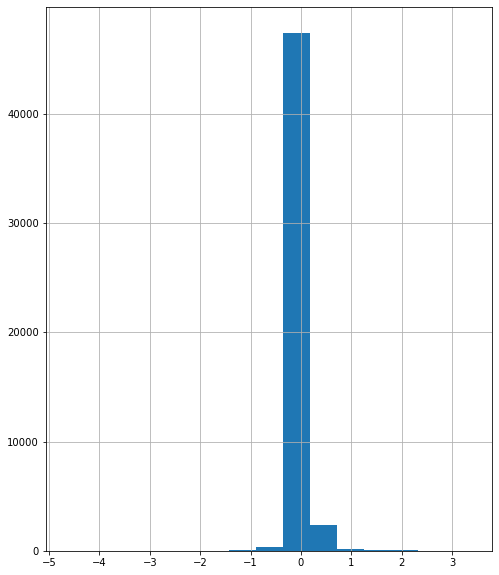

In [71]:
df.logerror.hist(figsize=(8, 10), bins=15)

array([[<AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedbathnbr'}>],
       [<AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'fullbathcnt'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>,
        <AxesSubplot:title={'center':'roomcnt'}>],
       [<AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'structuretaxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'landtaxvaluedollarcnt'}>],
       [<AxesSubplot:title={'center':'taxamount'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

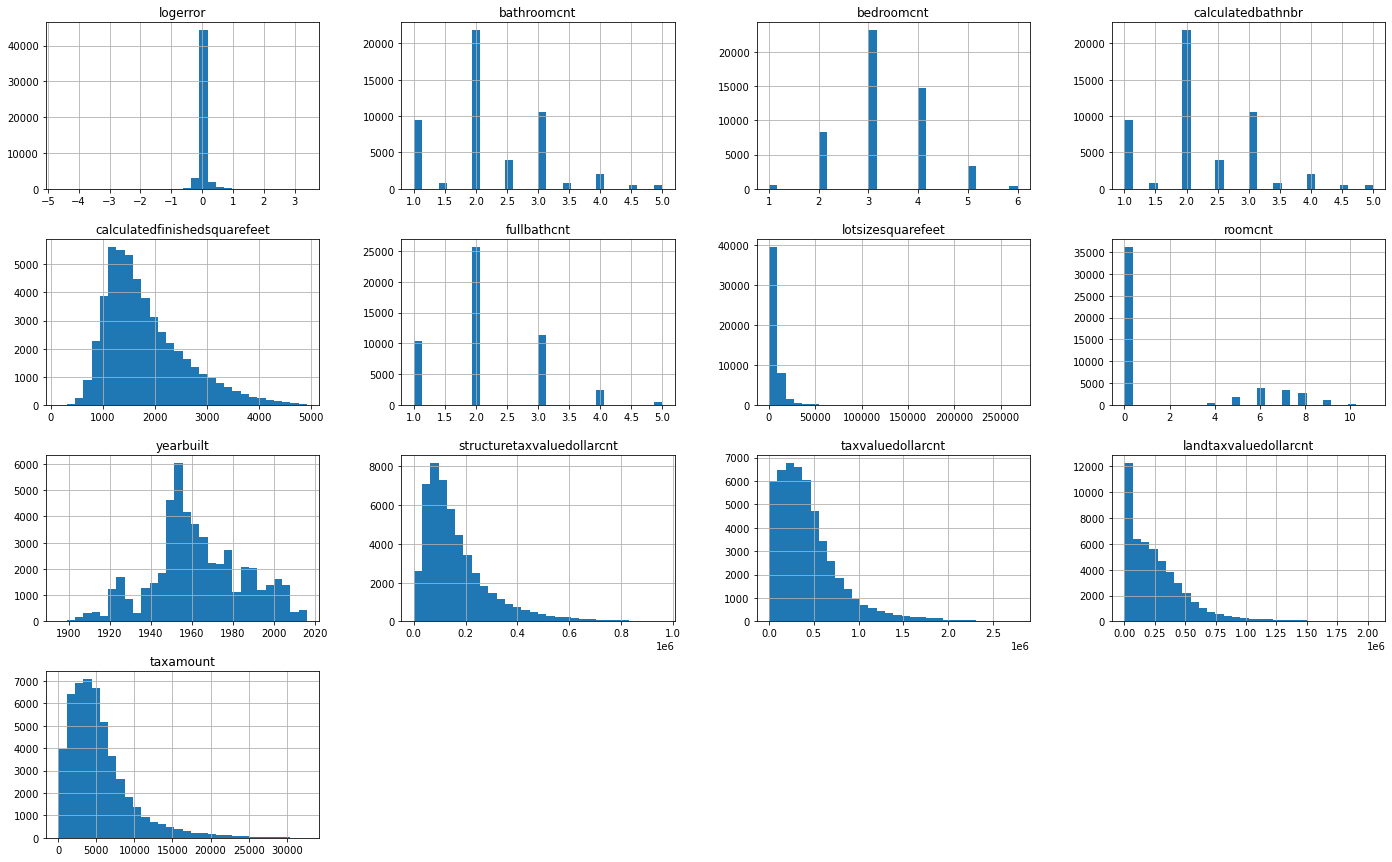

In [51]:
df.hist(figsize=(24, 15), bins=30)

In [76]:
bins = [-4.33, -2.33, -1.8, -1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.8, 2.33, 4.33 ]
df[['logerror_bins']] = df.logerror.groupby(bins)

KeyError: -4.33

In [73]:
bins = [-4.33, -2.33, -1.8, -1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.8, 2.33, 4.33 ]
df.groupby(['logerror', pd.cut(df.logerror, bins)]).agg(['min','max', 'mean']).T

logerror                               -4.655420                             \
logerror                          (-4.33, -2.33] (-2.33, -1.8] (-1.8, -1.0]   
parcelid                     min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
bathroomcnt                  min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
bedroomcnt                   min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
calculatedbathnbr            min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
calculatedfinishedsquarefeet min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
fullbathcnt                  min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
latitude                     min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
longitude                    min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
lotsizesquarefeet            min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
regionidcounty               min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
roomcnt                      min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
yearbuilt                    min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
structuretaxvaluedollarcnt   min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
taxvaluedollarcnt            min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
landtaxvaluedollarcnt        min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   
taxamount                    min             NaN           NaN          NaN   
                             max             NaN           NaN          NaN   
                             mean            NaN           NaN          NaN   

logerror                                         

## 2. Explore

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
logerror,50449.0,0.017423,0.171187,-4.65542,-0.024683,0.006465,0.039146,3.394544e+00
bathroomcnt,50449.0,2.212304,0.853992,1.00000,2.000000,2.000000,3.000000,5.000000e+00
bedroomcnt,50449.0,3.261234,0.878436,1.00000,3.000000,3.000000,4.000000,6.000000e+00
calculatedbathnbr,50449.0,2.212384,0.853945,1.00000,2.000000,2.000000,3.000000,5.000000e+00
calculatedfinishedsquarefeet,50449.0,1820.452363,767.035793,152.00000,1257.000000,1632.000000,2224.000000,4.922000e+03
...,...,...,...,...,...,...,...,...
yearbuilt,50449.0,1962.851703,22.627127,1895.00000,1950.000000,1960.000000,1978.000000,2.016000e+03
structuretaxvaluedollarcnt,50449.0,166779.294699,135155.439459,148.00000,75569.000000,128000.000000,212877.000000,9.585740e+05
taxvaluedollarcnt,50449.0,446235.763456,369230.970485,1000.00000,187982.000000,362436.000000,585000.000000,2.775000e+06
landtaxvaluedollarcnt,50449.0,279694.109213,278468.929828,161.00000,71775.000000,209323.000000,387600.000000,2.043868e+06


In [58]:
import split

In [59]:
train, validate, test = split.train_validate_test_split(df,'logerror')
train.shape, validate.shape, test.shape

((28251, 21), (12108, 21), (10090, 21))

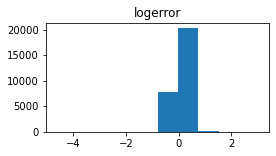

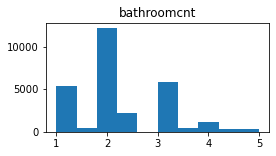

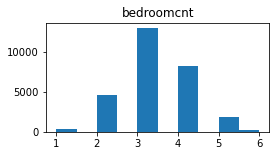

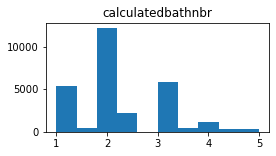

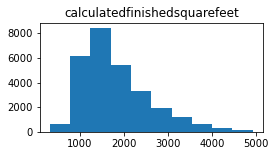

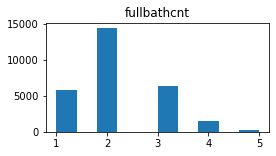

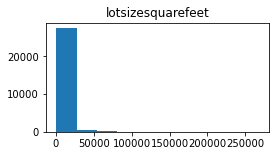

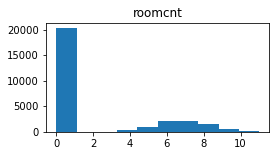

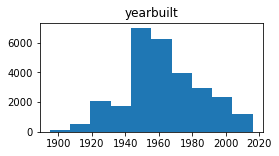

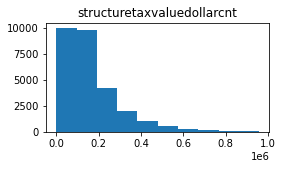

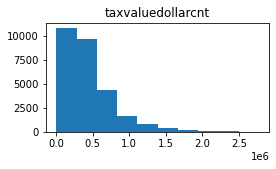

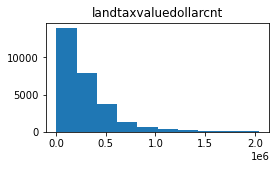

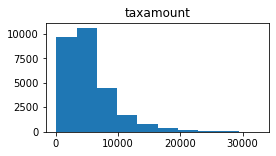

In [60]:
numeric_cols = df.select_dtypes('float64').columns
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Takeaways from single variable distributions:
- logerror is normal, centered on 0
- baths is right skewed, centered on 2
- beds is right skewed, centered on 4
- calcbathnbr is right skewed, centered on 2
- finishedsqft is right skewed, centered 2500
- fips is divided unequally among 3 counties, with LA highest
- roomcnt has a normal dist around 6.5, where not null or 0 (lots of zeroes)
- year built is is right skewed, centered on 1950-60
- get rid of columns with mainly one value:
    - assessemnt year
    - unitcnt
    - finishedsquareft12 is same as calculatedfinishedsqft
- make zips/ids into objects:
    - regionidzip
    - regionidcounty
    - regionidcity

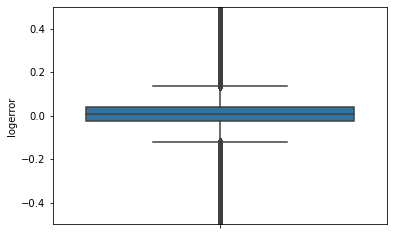

In [61]:
sns.boxplot(data=train, y=train.logerror)
plt.ylim(-0.5,0.5)
plt.show()

### Questions:
1. is there a relationship between logerror and fips?
2. is there a relationship between logerror and yearbuilt?
3. is there a relationship between logerror and taxvaluedollarcnt?
4. controlling for fips, is there a relationship between logerror and calculatedfinishedsqft?

### 1. is there a relationship between logerror and fips?

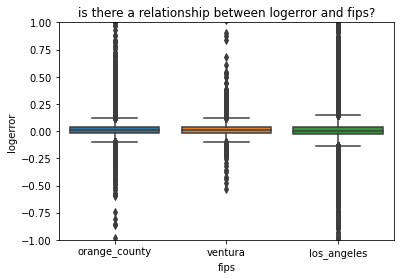

In [62]:
sns.boxplot(train.fips, train.logerror)
plt.title("is there a relationship between logerror and fips?")
plt.ylim(-1, 1)
plt.show()

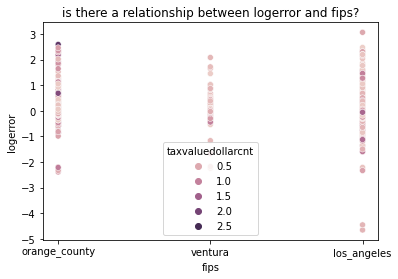

In [63]:
sns.scatterplot(train.fips, train.logerror, hue=train.taxvaluedollarcnt)
plt.title("is there a relationship between logerror and fips?")
plt.show()

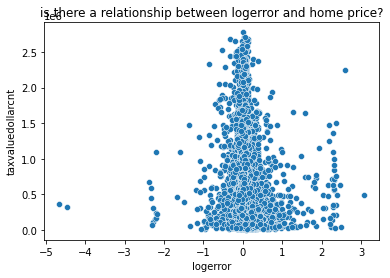

In [64]:
sns.scatterplot(x=train.logerror, y=train.taxvaluedollarcnt)
plt.title("is there a relationship between logerror and home price?")
plt.show()

-cluster centers as points on a polynomial linear function
